# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *E*

**Names:**

* *Enrico Benedettini*
* *Mak Fazlic*
* *Ali Essonni*
* *Youssef Amine*

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.1 Exploration of real networks

#### Exercise 2.1

1. Graph loading

In [32]:
import numpy as np
import random
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# First, we open the file, read its content in an array of lines and then close the file

G = nx.Graph()
with open("../data/network1.csv","r") as f:
    G = nx.read_edgelist(f,delimiter=',')

2. Number of nodes and edges

In [33]:
print(f"The graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")
f.close()

The graph has 13033 nodes and 18584 edges


#### Exercise 2.2:  Node degree distribution

1. Histogram plot

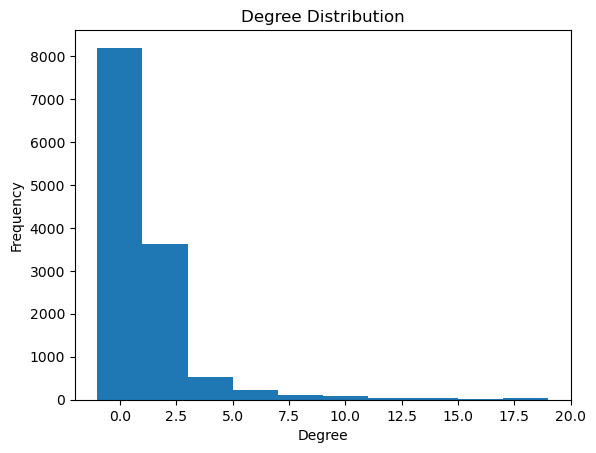

In [34]:
# To compute the degree distribution we simply get the histogram and plot the bar with as x values 
# all the different possible degrees of a node and as y the number of nodes having that degree

degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees, range=(0,20), histtype='bar', align='left', density=False)
# To have a significant plot of the degree distribution, we consider only the distribution between the first 20 degree values
# as otherwise the distribution is unbalanced as there's lots of random high values appearing once, that don't make it possible
# for us to visualize the more intuitive result of the plot of the distribution as the one shown below.
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()


2. Degree Distribution's statistics

In [35]:
mean = np.mean(degrees)
sigma = np.std(degrees)
variance = np.var(degrees)
p = mean / G.number_of_nodes()

# Print them
print(f"""
Again, to gain some insights on the distribution, we look at its main values:
min degree = {np.min(degrees)}
max degree = {np.max(degrees)}
mean = {mean}
median = {np.median(degrees)}
sigma = {sigma}
variance = {variance}
p = {p}
""")


Again, to gain some insights on the distribution, we look at its main values:
min degree = 1
max degree = 1482
mean = 2.8518376429064682
median = 1.0
sigma = 20.859853773744813
variance = 435.1334994620158
p = 0.00021881666868000217



3. Power Law distribution

 The distribution is close to a , like the pareto distribution. It has two parameters, the scale $x_m$, and the shape (otherwise known as pareto index) $\alpha$.

The statisical approach to finding the parameters would be using maximum likelihood parameter estimation. The maximum likelihood estimation formulas are given below:

$$\text{(the scale):}\quad\hat{x}_m = \min_i{x_i}$$

$$\text{(the shape / pareto index):}\quad\hat{\alpha} = \frac{n}{\sum_i{\ln(x_i/\hat{x}_m)}}$$

Since the minimum degree observed is 1, we can try to assume that $\hat{x}_m = 1$, but we will soon notice that this estimate is not accurate. We will try other values of $\hat{x}_m$ as well. $\hat{\alpha}$ is also calculated below.

#### Exercise 2.3: Giant component

In [36]:
num_of_components = nx.number_connected_components(G)
print(f"The graph has {num_of_components} connected components")

connected_components = nx.connected_components(G)
biggest = G.subgraph(max(connected_components, key=len))
print(f"The giant component has {biggest.number_of_nodes()} nodes and {biggest.number_of_edges()} edges")


The graph has 192 connected components
The giant component has 12576 nodes and 18317 edges


#### Exercise 2.4: Short paths & Small-worlds


As mentioned at https://networkx.org/documentation/stable/reference/algorithms/smallworld.html :
'A small world network is characterized by a small average shortest path length, and a large clustering coefficient'
and again
'Small-worldness is commonly measured with the coefficient sigma or omega',
We know that a network is a small-world network if sigma > 1.
Unfortunately, since the graph is very big, we first need to compute a random sample of it so that we're able to compute the average shortest path length over it.


The average clustering coefficient C is 0.0031976276038776035
The average clustering coefficient of the random sample Cr is 0.0031976276038776035
The average shortest path length L is 2.5321414986686954
The average shortest path length of the random sample Lr is 2.5321414986686954
and sigma = 0.15596388986653448 hence < 1, 
thus we can infer that network1 is not a small-world network.
In particular, since sigma might not be very significant, we can simply deduct that 

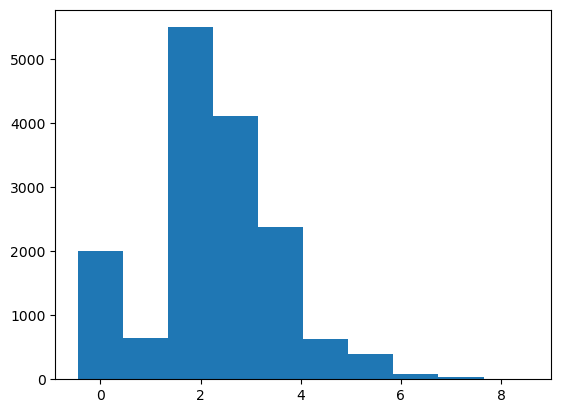

In [37]:
print(f"""
As mentioned at https://networkx.org/documentation/stable/reference/algorithms/smallworld.html :
'A small world network is characterized by a small average shortest path length, and a large clustering coefficient'
and again
'Small-worldness is commonly measured with the coefficient sigma or omega',
We know that a network is a small-world network if sigma > 1.
Unfortunately, since the graph is very big, we first need to compute a random sample of it so that we're able to compute the average shortest path length over it.
""")
def random_sample(G, sample_size=1000):
    sample_size = 2000 # We pick the sample size to be 1000, a small but big enough value to actually have a reasonable sample of the graph
    # First, we take a sample of the graph
    nodes = list(G.nodes())
    sample_nodes = random.sample(nodes, sample_size)
    G_sample = G.subgraph(sample_nodes)
    # Then we flatten it into a list of the shortest path lengths
    n = list(nx.shortest_path_length(G_sample))
    lengths = [d.values() for n, d in n]
    return ([item for sublist in lengths for item in sublist], G_sample)

lengths_flat, G_sample = random_sample(G,10000)
G_sample_random = nx.lattice_reference(G_sample)
n = list(nx.shortest_path_length(G_sample))
lengths = [d.values() for n, d in n]
lengths_flat_random = [item for sublist in lengths for item in sublist]
# lengths_flat_random, G_sample_random = random_sample(G_sample,500)
plt.hist(lengths_flat, align='left')
C = nx.average_clustering(G_sample)
Cr = nx.average_clustering(G_sample_random)
L = np.average(lengths_flat)
Lr = np.average(lengths_flat_random)
sigma = C/Cr/L/Lr
print(f"""
The average clustering coefficient C is {C}
The average clustering coefficient of the random sample Cr is {Cr}
The average shortest path length L is {L}
The average shortest path length of the random sample Lr is {Lr}
and sigma = {sigma} hence < 1, 
thus we can infer that network1 is not a small-world network.
In particular, since sigma might not be very significant, we can simply deduct that this networks is not a small-world network because of the dimension of C and L.
Indeed, without evaluating sigma, we might first check the shortest path length distribution.
This gives us a very connected graph with every node being reachable in less than 7 steps.
But, when it later comes to compute its clustering coefficient, we immediately see that this value is very very low which is also why sigma is not bigger than 1.as_integer_ratio
""")


Indeed, as we see from the average degree connectivity graph as well,
we understand that the graph has few very connected components, and various less connected components
as intuitive also from the degree distribution plotted above, which we already had to cut because
of this very few high degree nodes.



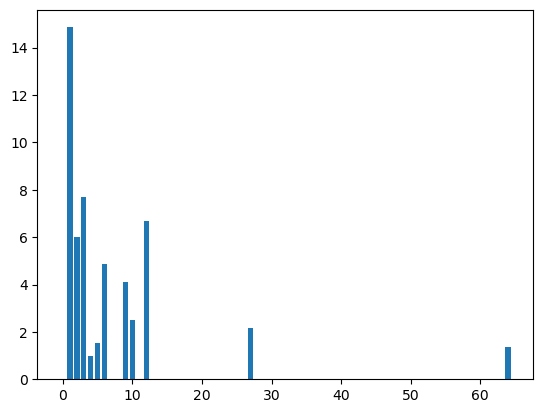

In [38]:
avg_degree_connectivity = nx.average_degree_connectivity(G_sample)
x = avg_degree_connectivity.keys()
y = avg_degree_connectivity.values()
plt.bar(x,y)
print("""
Indeed, as we see from the average degree connectivity graph as well,
we understand that the graph has few very connected components, and various less connected components
as intuitive also from the degree distribution plotted above, which we already had to cut because
of this very few high degree nodes.
""")

#### Exercise 2.5: Network comparison

The graph has 26542 nodes and 43516 edges


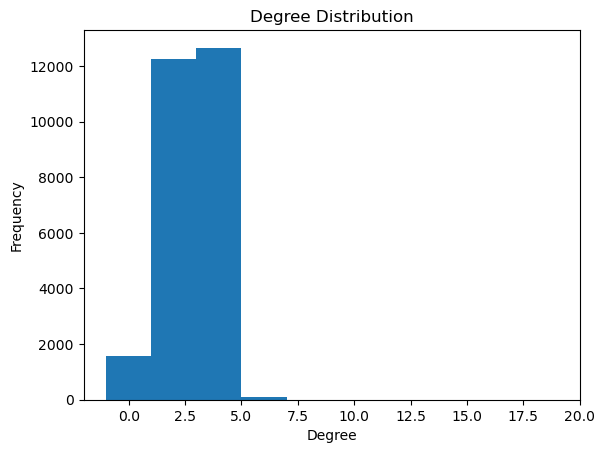

In [39]:

with open("../data/network2.csv","r") as f:
    G = nx.read_edgelist(f,delimiter=',')
    print(f"The graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")
    f.close()

degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees, range=(0,20), histtype='bar', align='left', density=False)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()



Degree Distribution's statistics

In [40]:
mean = np.mean(degrees)
sigma = np.std(degrees)
variance = np.var(degrees)
p = mean / G.number_of_nodes()

# Print them
print(f"""
Again, to gain some insights on the distribution, we look at its main values:
min degree = {np.min(degrees)}
max degree = {np.max(degrees)}
mean = {mean}
median = {np.median(degrees)}
sigma = {sigma}
variance = {variance}
p = {p}
""")


Again, to gain some insights on the distribution, we look at its main values:
min degree = 1
max degree = 8
mean = 3.2790294627383014
median = 3.0
sigma = 0.90164134609217
variance = 0.8129571169829002
p = 0.00012354115977463272



Giant Component

In [41]:
num_of_components = nx.number_connected_components(G)
print(f"The graph has {num_of_components} connected components")
connected_components = nx.connected_components(G)
biggest = G.subgraph(max(connected_components, key=len))
print(f"The giant component has {biggest.number_of_nodes()} nodes and {biggest.number_of_edges()} edges")


The graph has 5 connected components
The giant component has 26481 nodes and 43437 edges


Short paths & Small-worlds


The average clustering coefficient C is 0.0015
The average clustering coefficient of the random sample Cr is 0.0015
The average shortest path length L is 0.2805155420773313
The average shortest path length of the random sample Lr is 0.2805155420773313


' \n 0 < 1 thus, network2 is not a small-world network.\nWe can deduce this easily simply by looking at the shortest path length distribution.\n'

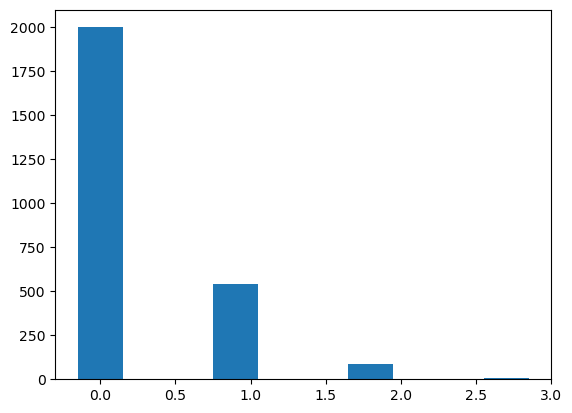

In [42]:
lengths_flat, G_sample = random_sample(G,40000)

G_sample_random = nx.lattice_reference(G_sample)
n = list(nx.shortest_path_length(G_sample))
lengths = [d.values() for n, d in n]
lengths_flat_random = [item for sublist in lengths for item in sublist]
# lengths_flat_random, G_sample_random = random_sample(G_sample,500)
plt.hist(lengths_flat, align='left')
C = nx.average_clustering(G_sample)
Cr = nx.average_clustering(G_sample_random)
L = np.average(lengths_flat)
Lr = np.average(lengths_flat_random)
print(f"""
The average clustering coefficient C is {C}
The average clustering coefficient of the random sample Cr is {Cr}
The average shortest path length L is {L}
The average shortest path length of the random sample Lr is {Lr}""")
(f""" 
 {0} < 1 thus, network2 is not a small-world network.
We can deduce this easily simply by looking at the shortest path length distribution.
""")

<BarContainer object of 4 artists>

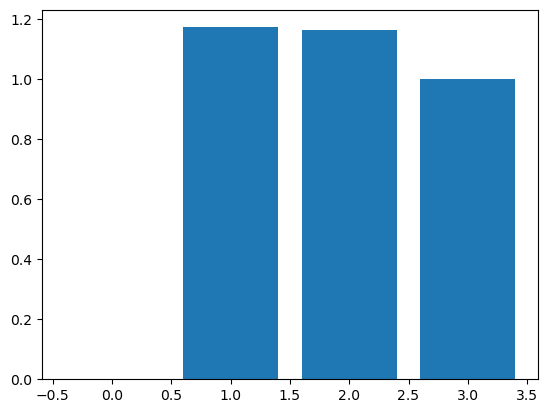

In [43]:
avg_degree_connectivity = nx.average_degree_connectivity(G_sample)
x = avg_degree_connectivity.keys()
y = avg_degree_connectivity.values()
plt.bar(x,y)
# print("""
# Indeed, as we see from the average degree connectivity graph as well,
# we understand that the graph has few very connected components, and various less connected components
# as intuitive also from the degree distribution plotted above, which we already had to cut because
# of this very few high degree nodes.
# """)

From the connectivity distribution and the sigma value we can easily infer that the network is a small-world network as it has a very low  and

#### Exercise 2.6: Network identification